In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,KBinsDiscretizer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn import set_config 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("bank.csv",sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
data['y'].value_counts() 

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
y1 = data['y']

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


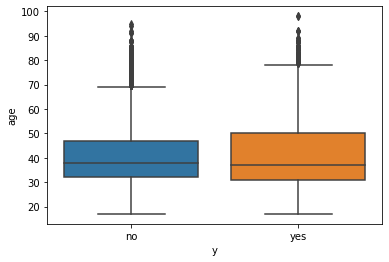

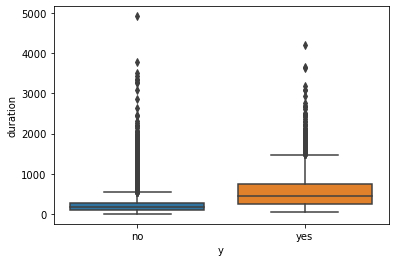

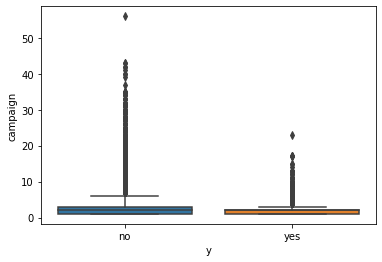

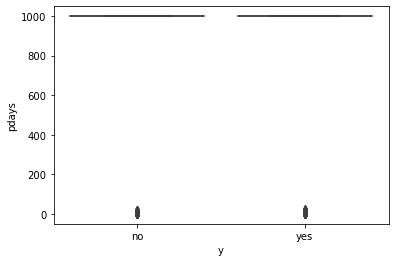

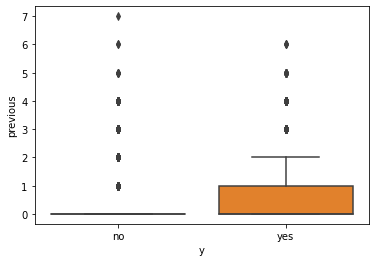

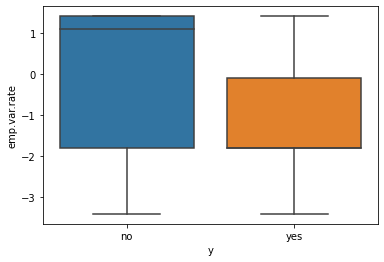

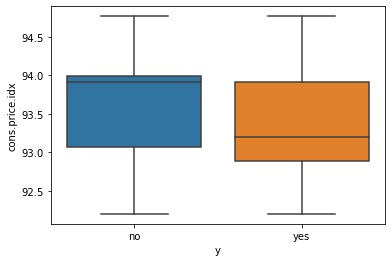

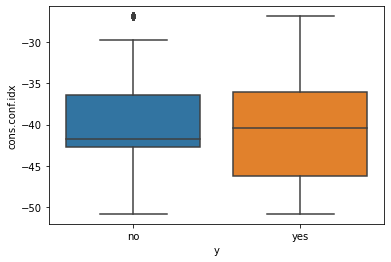

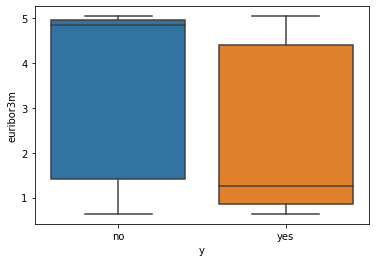

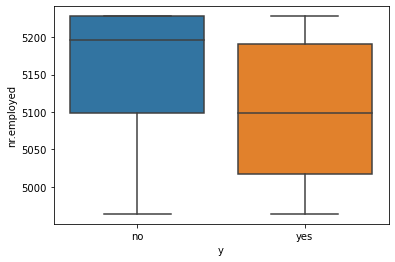

In [8]:
num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
  sns.boxplot(x = y1,y = i,data = data)
  plt.show();

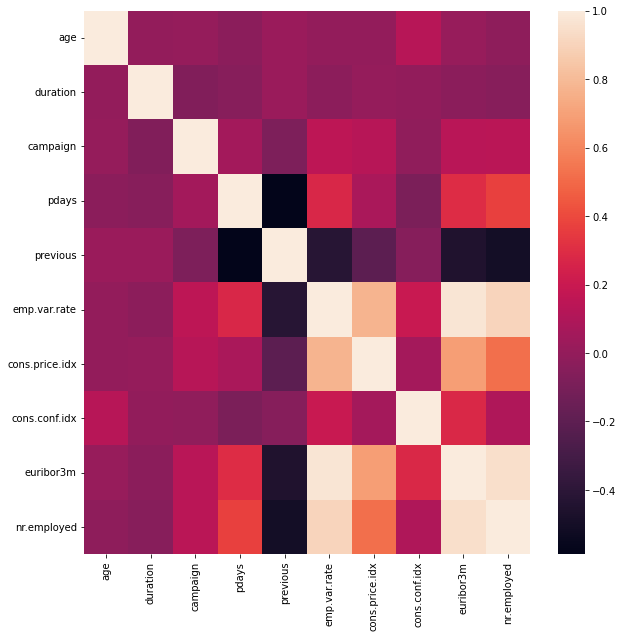

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr())
plt.show()

In [10]:
catvar=[i for i in data.columns if i not in num_var]


In [11]:
y1 = y1.values

In [12]:

bank1 = pd.get_dummies(data)

In [13]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

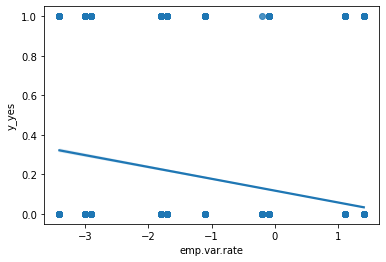

In [14]:
ax = sns.regplot(x="emp.var.rate", y="y_yes", order=1, data=bank1, truncate=True)

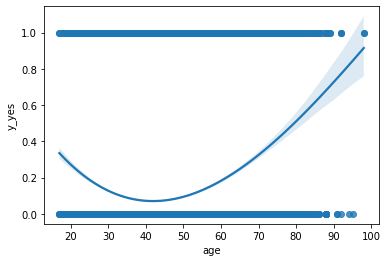

In [15]:
sns.regplot(x="age", y="y_yes", order=3, data=bank1, truncate=True);

In [16]:
y_yes1 = bank1['y_yes']
y_no1 = bank1['y_no']

bank1.drop('y_yes',axis = 1,inplace = True)
bank1.drop('y_no',axis = 1,inplace = True)

In [17]:
forest = RandomForestClassifier(n_estimators=350,
                                random_state=0)
forest.fit(bank1,y1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [18]:
print("Feature ranking:")
for f in range(bank1.shape[1]):
    print("%d. %s: %f " % (f + 1, bank1.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. duration: 0.282091 
2. euribor3m: 0.094536 
3. age: 0.079953 
4. nr.employed: 0.049350 
5. campaign: 0.039866 
6. pdays: 0.030400 
7. cons.conf.idx: 0.026077 
8. cons.price.idx: 0.023676 
9. emp.var.rate: 0.019739 
10. poutcome_success: 0.019149 
11. housing_no: 0.013315 
12. housing_yes: 0.013118 
13. job_admin.: 0.012119 
14. education_university.degree: 0.011966 
15. previous: 0.011869 
16. marital_married: 0.011642 
17. day_of_week_mon: 0.010883 
18. education_high.school: 0.010787 
19. day_of_week_thu: 0.010758 
20. marital_single: 0.010609 
21. day_of_week_wed: 0.010422 
22. day_of_week_tue: 0.010376 
23. day_of_week_fri: 0.009896 
24. job_technician: 0.009840 
25. loan_no: 0.009253 
26. loan_yes: 0.008882 
27. education_professional.course: 0.008338 
28. job_blue-collar: 0.007990 
29. poutcome_nonexistent: 0.007754 
30. education_basic.9y: 0.007560 
31. poutcome_failure: 0.007215 
32. marital_divorced: 0.007115 
33. contact_cellular: 0.006686 
34. contact_tel

<Figure size 432x288 with 0 Axes>

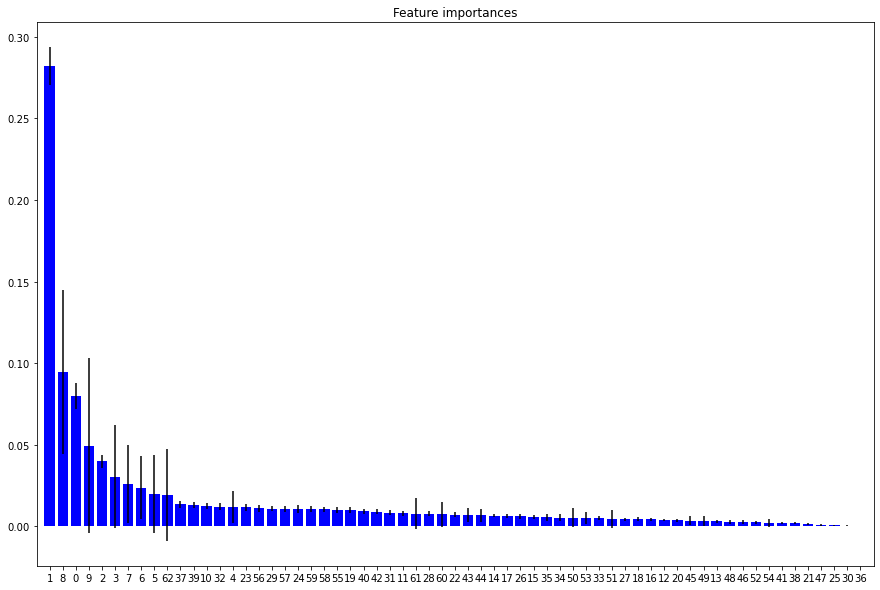

In [19]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.bar(range(bank1.shape[1]), importances[indices],color="b", yerr=std[indices], align="center")
plt.xticks(range(bank1.shape[1]), indices)
plt.xlim([-1, bank1.shape[1]])
plt.show();

In [20]:
X_train, X_test, y_train, y_test = train_test_split(bank1, y1, test_size=0.2, random_state=1, stratify=y1)

In [21]:
for i in range(10,300,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    print(accuracy_score(knn.predict(X_test),y_test))


0.9098082058752124
0.9134498664724447
0.911750424860403
0.9141781985918912
0.9136926438455936
0.9136926438455936
0.9139354212187424
0.9139354212187424
0.9139354212187424
0.9136926438455936
0.9135712551590192
0.9133284777858703
0.9132070890992959
0.9134498664724447
0.9134498664724447
0.9130857004127215
0.9133284777858703
0.9129643117261471
0.9127215343529983
0.9132070890992959
0.9123573682932751
0.9121145909201263
0.9119932022335518
0.9126001456664239
0.9122359796067007
0.9127215343529983
0.9123573682932751
0.9124787569798495
0.9121145909201263


In [22]:
t = pd.DataFrame()
t['y_yes'] = y_yes1
t['y_no'] = y_no1
t.head()

,y_yes,y_no
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
print("For age upto 30")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(bank1[(bank1['age'] <= 30) & (bank1['campaign']==i) & (t['y_yes']==1)].shape[0])
    den = 1+float(bank1[(bank1['age'] <= 30) & (data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age upto 30
Nth Call 	 Efficiency
1 		 0.07502708559046588
2 		 0.07100309745055992
3 		 0.06274509803921569
4 		 0.04447739065974796
5 		 0.03882352941176471
6 		 0.02058319039451115
7 		 0.030805687203791468
8 		 0.006493506493506494
9 		 0.012875536480686695
10 		 0.005376344086021506
11 		 0.013888888888888888
12 		 0.0
13 		 0.010869565217391304
14 		 0.0
15 		 0.014705882352941176
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [31]:
total_calls = sum(bank1['campaign'])
print(total_calls)

105754


In [32]:
extra_calls = sum(bank1[bank1['campaign']>6]['campaign']) - 6*bank1[bank1['campaign']>6].shape[0]
print(extra_calls)

12040


In [33]:
reduction=100*extra_calls/total_calls
print(reduction)

11.384912154622993


In [34]:
total_sales=float(t[t['y_yes']==1].shape[0])
print(total_sales)

4640.0
